In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle



import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("weatherAUS.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.shape

(8425, 23)

In [6]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [9]:
df.isnull().sum()


Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [11]:

elements = df.select_dtypes(include=['object']).columns

print(elements)

for i in elements:
    df[i] = df[i].fillna(df[i].mode()[0])

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


In [12]:
cont = df.select_dtypes(include=['float']).columns

print(cont)

for i in cont:
    df[i] = df[i].fillna(df[i].mean())

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')


In [14]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [15]:
df['Day']= df['Date'].str.split('-').str[2]
df['Month']= df['Date'].str.split('-').str[1]
df['Year'] = df['Date'].str.split('-').str[0]

df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,01,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,02,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,03,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,04,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,05,12,2008


In [16]:
df['Month'].unique()

array(['12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11'], dtype=object)

In [17]:
df['Year'].unique()

array(['2008', '2009', '2010', '2011', '2013', '2014', '2015', '2016',
       '2017', '2012'], dtype=object)

In [18]:
df['Day'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [19]:
df['Day'] = df['Day'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

In [20]:
df['Location'].unique()


array(['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
       'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
       'Darwin', 'Uluru'], dtype=object)

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


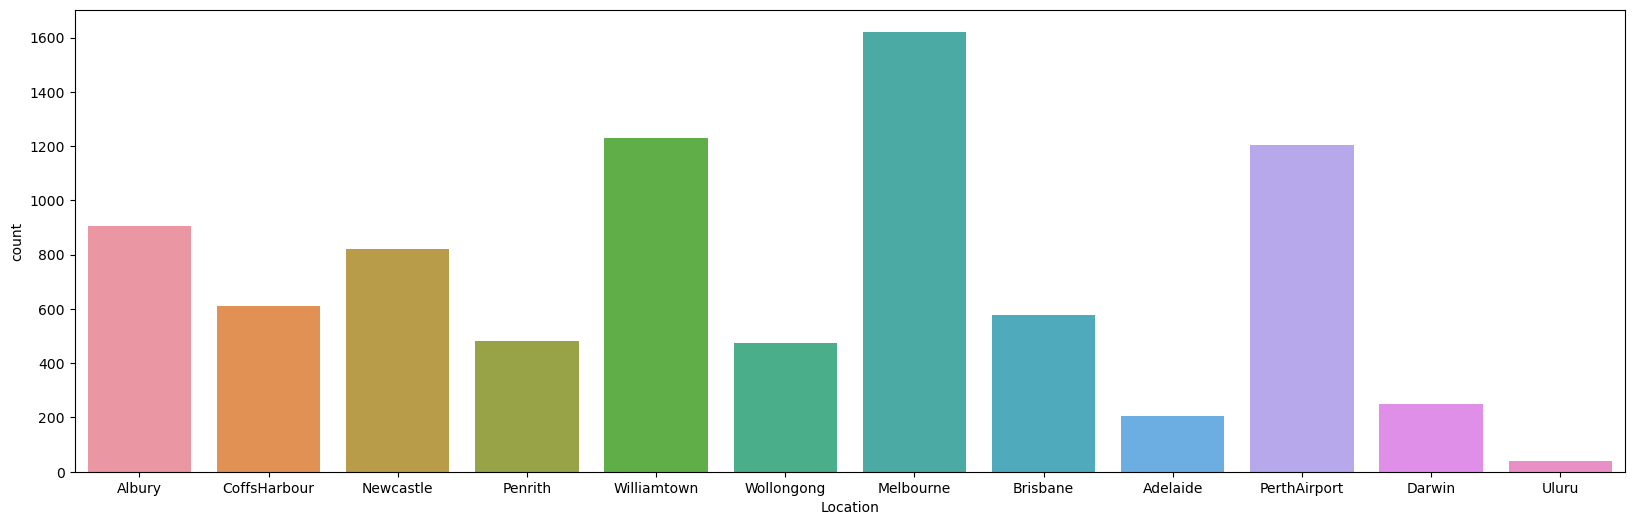

In [22]:
plt.figure(figsize=(20,6))
sns.countplot(df['Location'])
print(df['Location'].value_counts())

In [23]:
df['WindGustDir'].unique()


array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: WindGustDir, dtype: int64


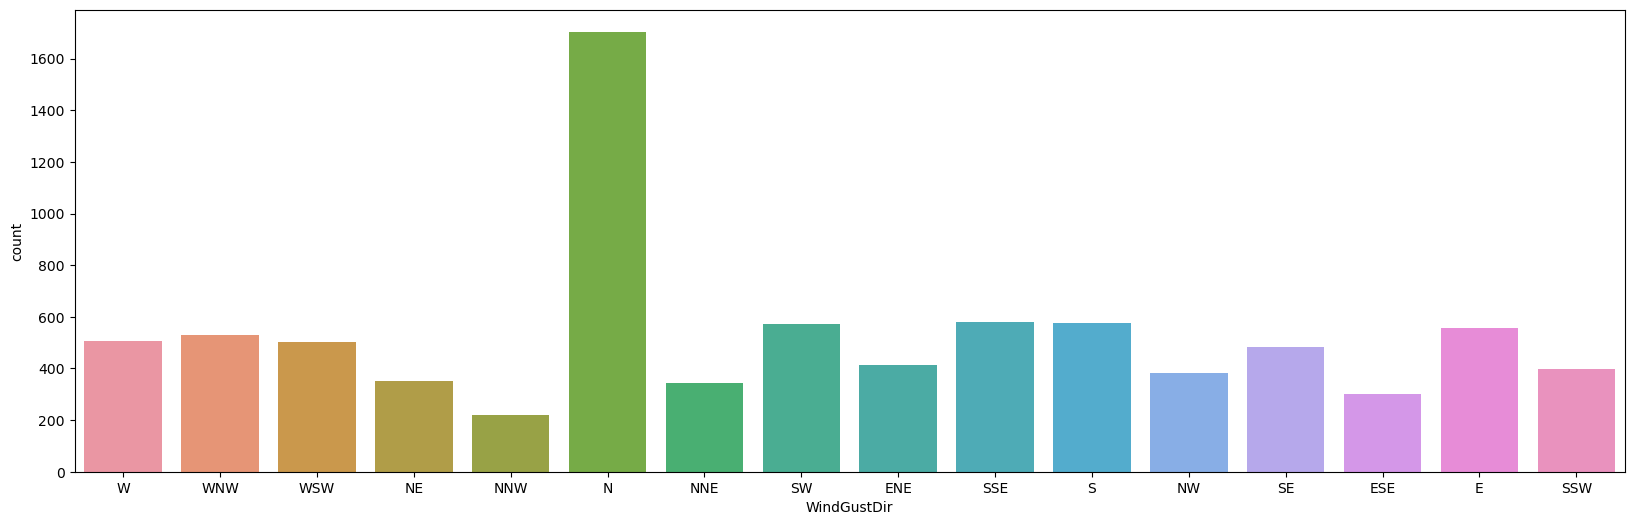

In [24]:
plt.figure(figsize=(20,6))
sns.countplot(df['WindGustDir'])
print(df['WindGustDir'].value_counts())

N      1735
SW      704
NW      625
WSW     543
SE      505
WNW     480
SSW     467
ENE     433
NNE     430
W       414
NE      409
S       402
E       380
SSE     365
NNW     280
ESE     253
Name: WindDir9am, dtype: int64


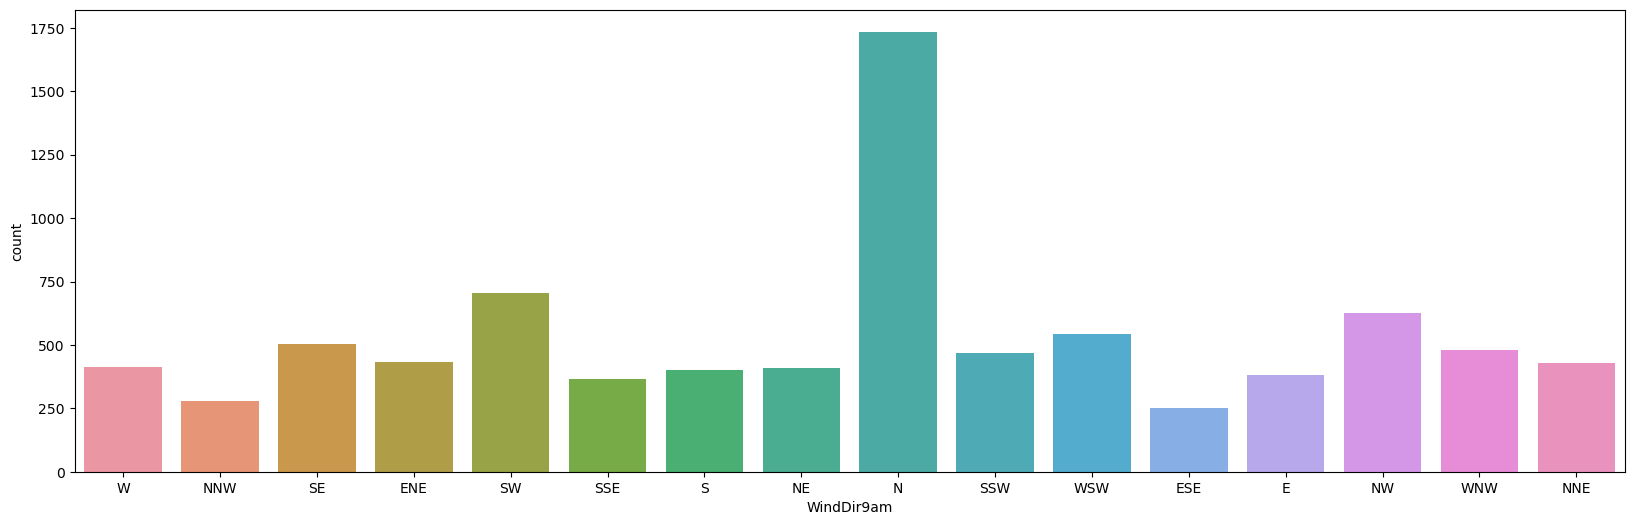

In [25]:
plt.figure(figsize=(20,6))
sns.countplot(df['WindDir9am'])
print(df['WindDir9am'].value_counts())

SE     1121
S       742
SSE     623
WSW     580
NE      544
N       524
SW      494
WNW     487
NW      468
W       462
ESE     462
E       460
ENE     417
SSW     370
NNE     365
NNW     306
Name: WindDir3pm, dtype: int64


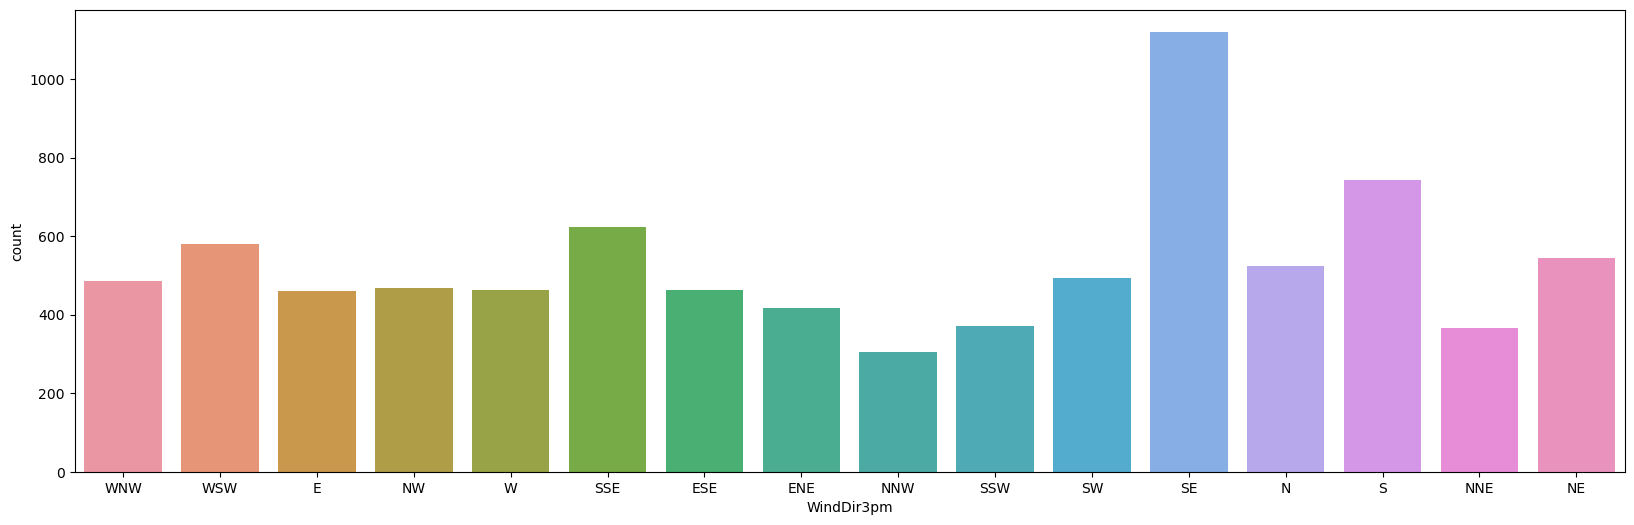

In [26]:
plt.figure(figsize=(20,6))
sns.countplot(df['WindDir3pm'])
print(df['WindDir3pm'].value_counts())

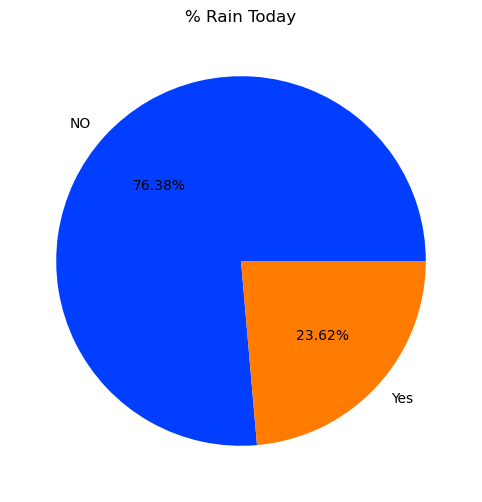

In [28]:
plt.figure(figsize=(10,6))

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(df['RainToday'].value_counts()*100.0 /len(df),
        labels=['NO', 'Yes'],
        colors=palette_color,
        autopct='%.2f%%')
  
# displaying chart
plt.title('% Rain Today')
plt.show()

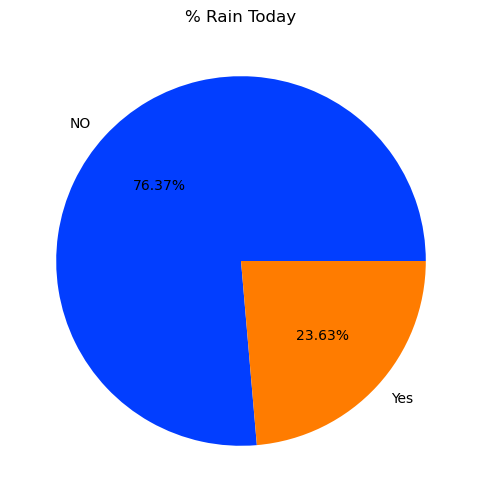

In [29]:
plt.figure(figsize=(10,6))

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(df['RainTomorrow'].value_counts()*100.0 /len(df),
        labels=['NO', 'Yes'],
        colors=palette_color,
        autopct='%.2f%%')
  
# displaying chart
plt.title('% Rain Today')
plt.show()

<AxesSubplot:xlabel='MinTemp', ylabel='Density'>

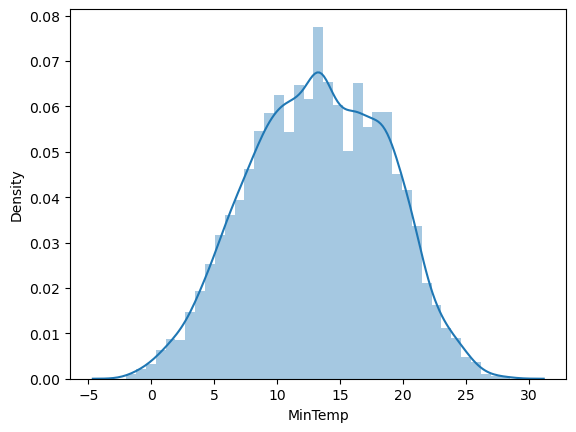

In [30]:
sns.distplot(df['MinTemp'])

<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

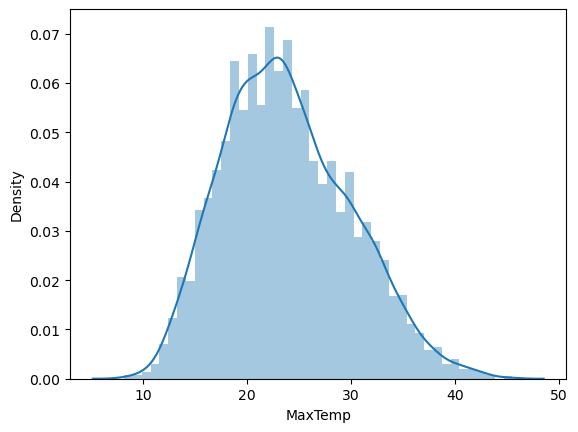

In [31]:
sns.distplot(df['MaxTemp'])


<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

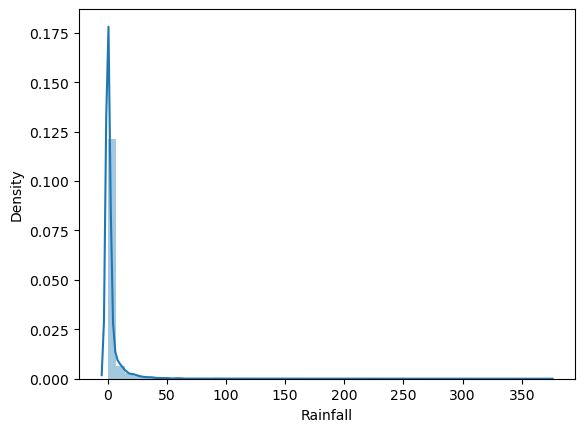

In [32]:
sns.distplot(df['Rainfall'])

<AxesSubplot:xlabel='Evaporation', ylabel='Density'>

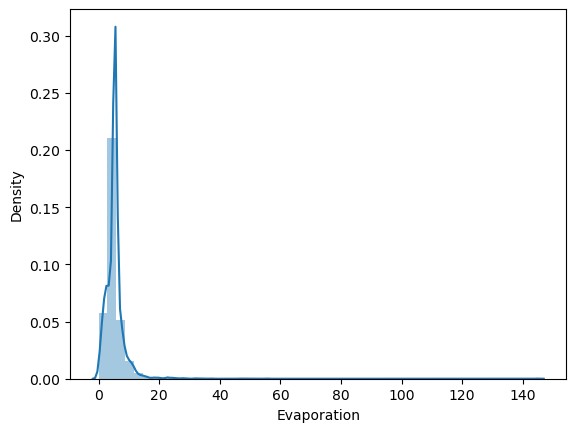

In [33]:
sns.distplot(df['Evaporation'])


<AxesSubplot:xlabel='Sunshine', ylabel='Density'>

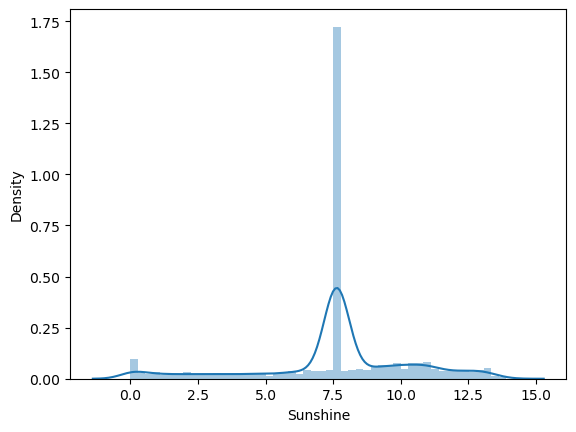

In [34]:
sns.distplot(df['Sunshine'])


<AxesSubplot:xlabel='WindGustSpeed', ylabel='Density'>

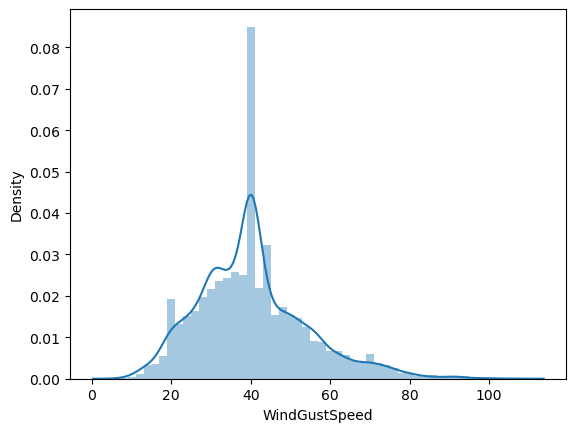

In [35]:
sns.distplot(df['WindGustSpeed'])

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Density'>

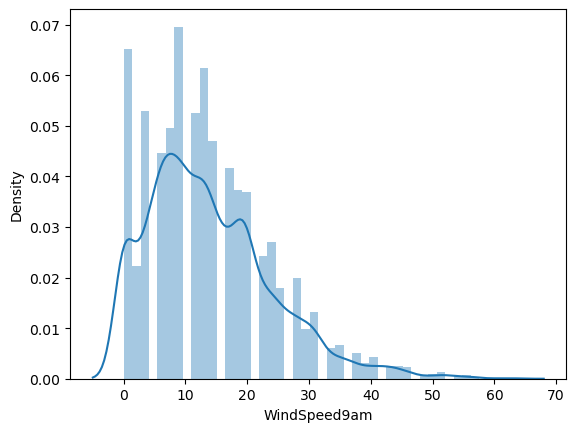

In [36]:
sns.distplot(df['WindSpeed9am'])

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Density'>

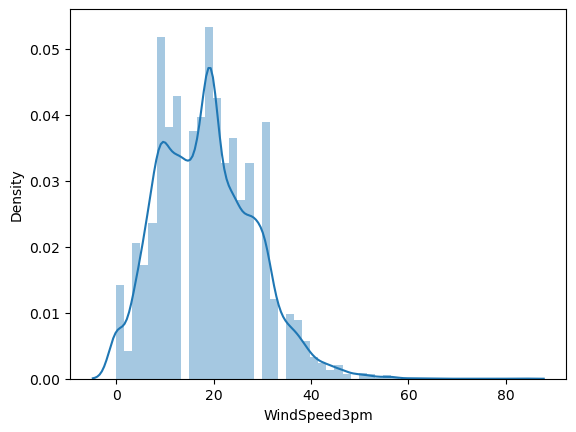

In [37]:
sns.distplot(df['WindSpeed3pm'])


<AxesSubplot:xlabel='Humidity9am', ylabel='Density'>

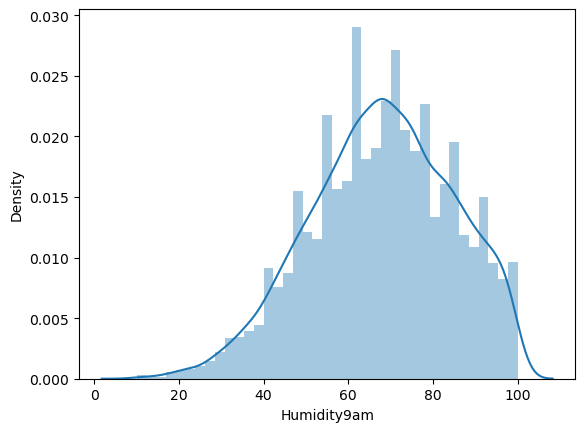

In [38]:
sns.distplot(df['Humidity9am'])


<AxesSubplot:xlabel='Humidity3pm', ylabel='Density'>

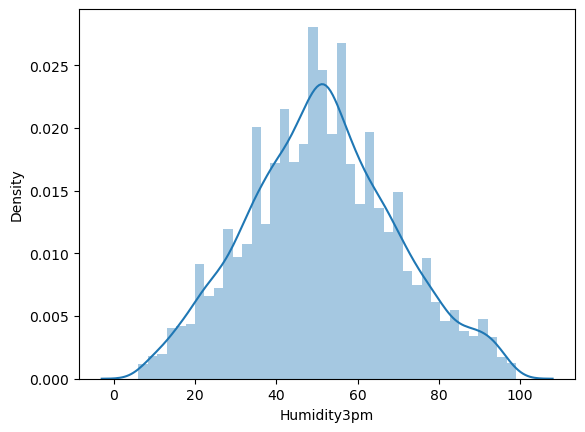

In [39]:
sns.distplot(df['Humidity3pm'])


<AxesSubplot:xlabel='Pressure9am', ylabel='Density'>

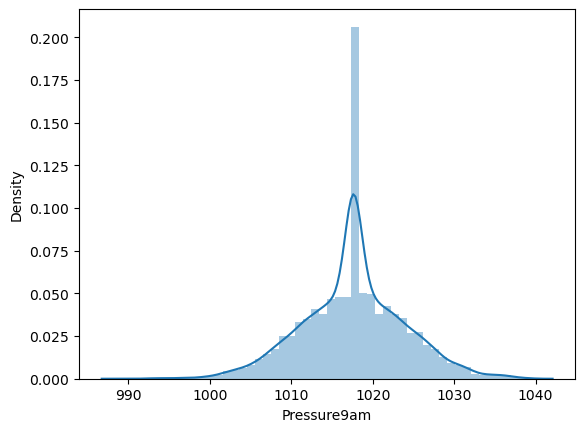

In [40]:
sns.distplot(df['Pressure9am'])


<AxesSubplot:xlabel='Pressure3pm', ylabel='Density'>

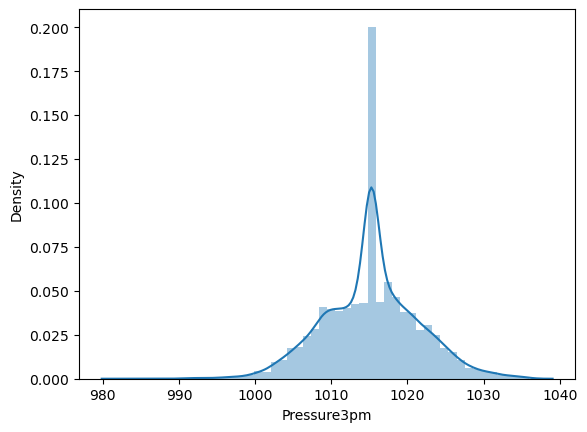

In [41]:
sns.distplot(df['Pressure3pm'])


<AxesSubplot:xlabel='Cloud9am', ylabel='Density'>

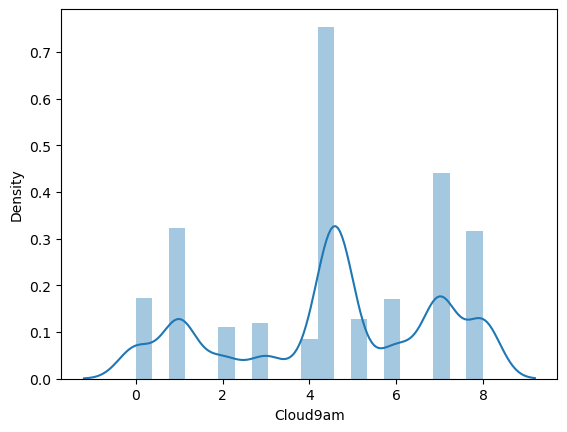

In [42]:
sns.distplot(df['Cloud9am'])


<AxesSubplot:xlabel='Cloud3pm', ylabel='Density'>

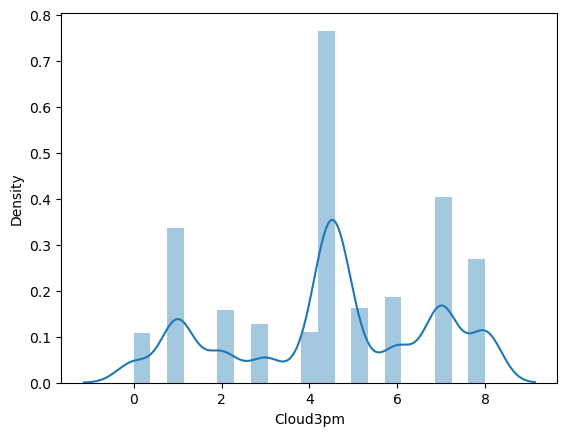

In [43]:
sns.distplot(df['Cloud3pm'])


<AxesSubplot:xlabel='Temp9am', ylabel='Density'>

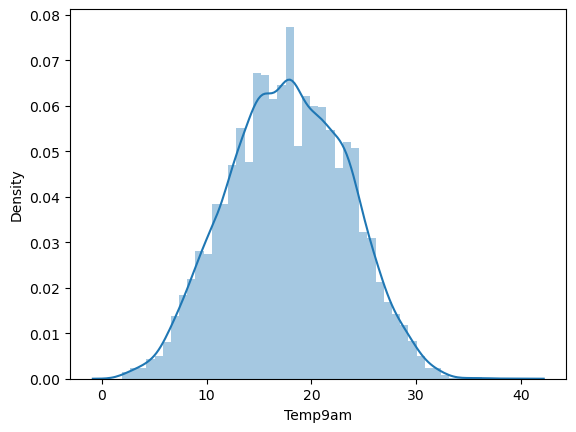

In [44]:
sns.distplot(df['Temp9am'])


<AxesSubplot:xlabel='Temp3pm', ylabel='Density'>

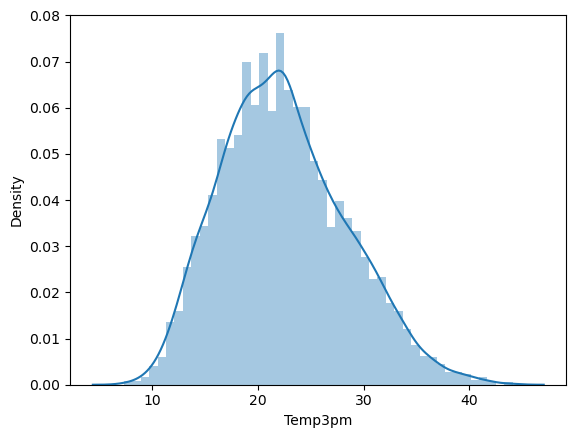

In [45]:
sns.distplot(df['Temp3pm'])


In [46]:
df['Avg_WindSpeed']=(df['WindSpeed9am']+df['WindSpeed3pm'])/2

df['Avg_Humidity']=(df['Humidity9am']+df['Humidity3pm'])/2

df['Avg_Cloud']=(df['Cloud9am']+df['Cloud3pm'])/2

df['Avg_Temp'] = (df['Temp9am']+df['Temp3pm'])/2

df['Avg_Pressure']=(df['Pressure9am']+df['Pressure3pm'])/2

In [48]:
df = df.drop(columns = ['Date', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Pressure9am', 'Pressure3pm'], axis=1)

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Day,Month,Year,Avg_WindSpeed,Avg_Humidity,Avg_Cloud,Avg_Temp,Avg_Pressure
0,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,WNW,No,No,1,12,2008,22.0,46.5,6.251591,19.35,1007.40
1,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,WSW,No,No,2,12,2008,13.0,34.5,4.534902,20.75,1009.20
2,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,WSW,No,No,3,12,2008,22.5,34.0,3.283311,22.10,1008.15
3,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,E,No,No,4,12,2008,10.0,30.5,4.534902,22.30,1015.20
4,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,NW,No,No,5,12,2008,13.5,57.5,7.500000,23.75,1008.40


<AxesSubplot:xlabel='Avg_WindSpeed', ylabel='Density'>

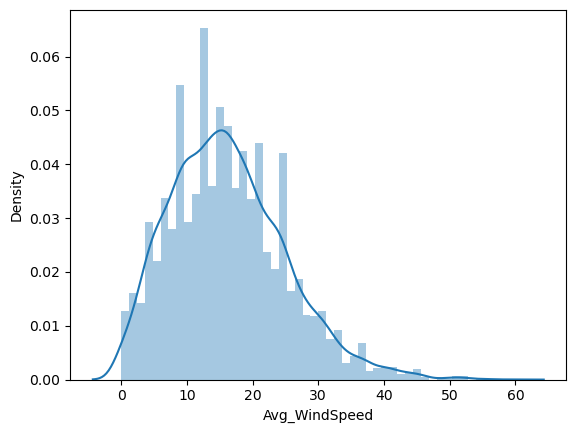

In [49]:
sns.distplot(df['Avg_WindSpeed'])


<AxesSubplot:xlabel='Avg_Cloud', ylabel='Density'>

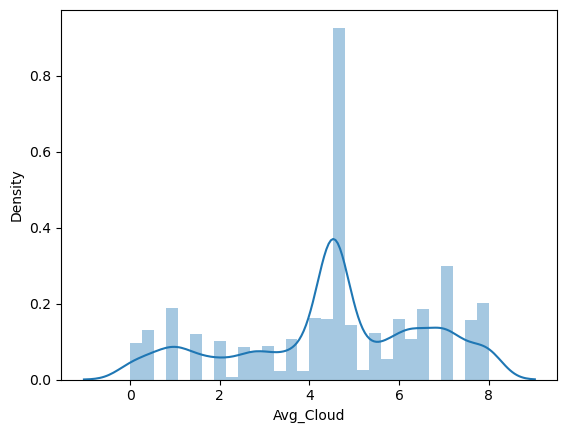

In [50]:
sns.distplot(df['Avg_Cloud'])


<AxesSubplot:xlabel='Avg_Humidity', ylabel='Density'>

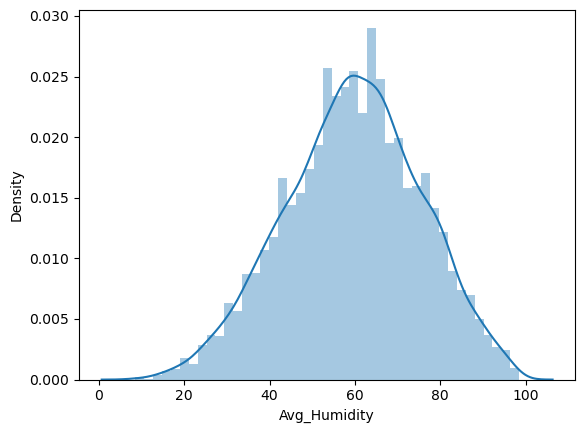

In [51]:
sns.distplot(df['Avg_Humidity'])


<AxesSubplot:xlabel='Avg_Pressure', ylabel='Density'>

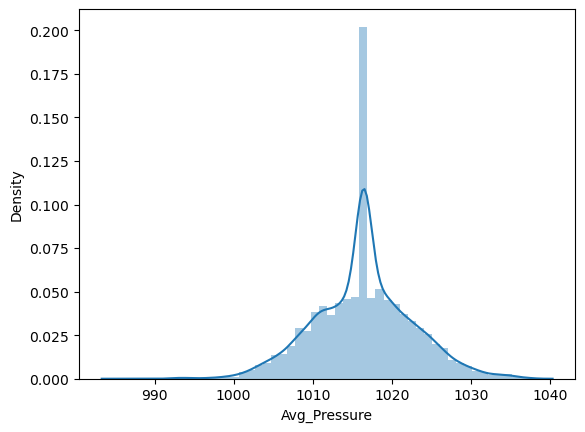

In [52]:
sns.distplot(df['Avg_Pressure'])


<AxesSubplot:xlabel='Avg_Temp', ylabel='Density'>

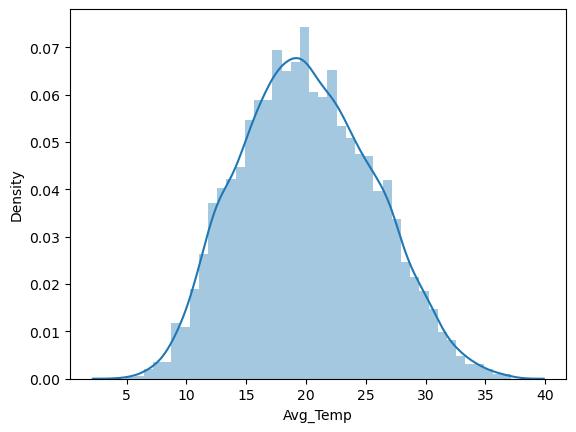

In [53]:
sns.distplot(df['Avg_Temp'])


<AxesSubplot:xlabel='RainToday', ylabel='Avg_Temp'>

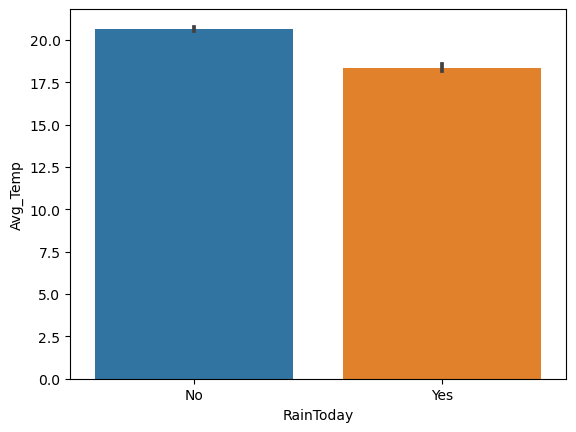

In [58]:
sns.barplot(y='Avg_Temp', x='RainToday', data = df)


In [55]:
df.columns


Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow', 'Day', 'Month', 'Year', 'Avg_WindSpeed', 'Avg_Humidity',
       'Avg_Cloud', 'Avg_Temp', 'Avg_Pressure'],
      dtype='object')

<AxesSubplot:xlabel='RainToday', ylabel='Avg_Pressure'>

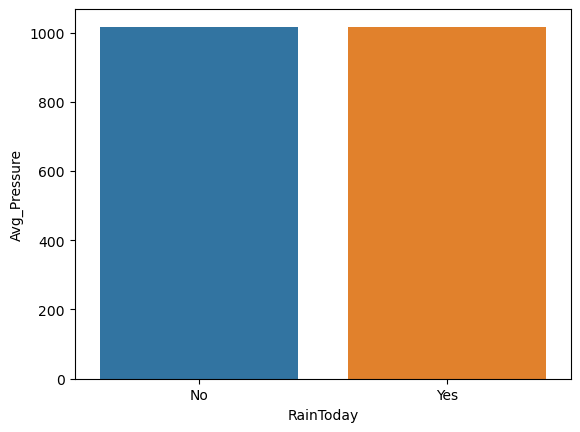

In [59]:
sns.barplot(y='Avg_Pressure', x='RainToday', data = df)


<AxesSubplot:xlabel='RainToday', ylabel='Avg_Cloud'>

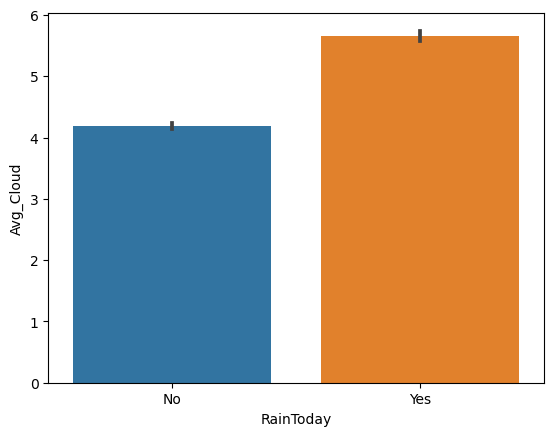

In [60]:
sns.barplot(y='Avg_Cloud', x='RainToday', data = df)


<AxesSubplot:xlabel='RainToday', ylabel='Avg_Humidity'>

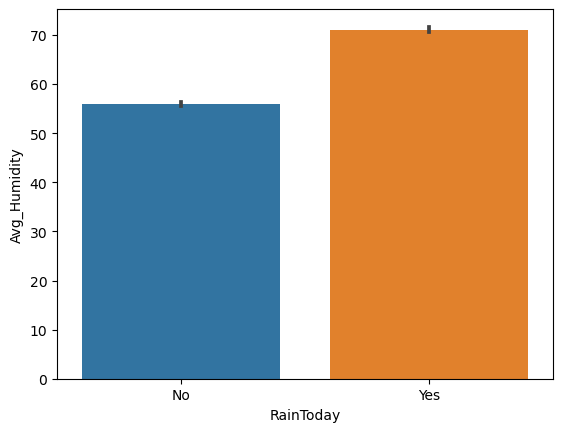

In [61]:
sns.barplot(y='Avg_Humidity', x='RainToday', data = df)


<AxesSubplot:xlabel='RainToday', ylabel='Avg_WindSpeed'>

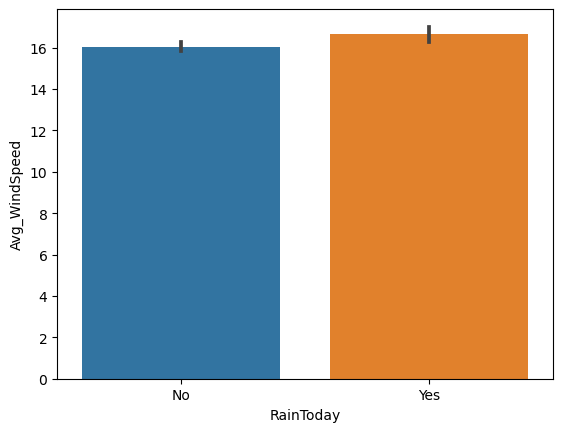

In [62]:
sns.barplot(y='Avg_WindSpeed', x='RainToday', data = df)


Data Encoding

In [63]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

catg = df.select_dtypes(include=['object']).columns

catg

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [65]:
for i in catg:
    df[i] = enc.fit_transform(df[i])

In [66]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Day,Month,Year,Avg_WindSpeed,Avg_Humidity,Avg_Cloud,Avg_Temp,Avg_Pressure
0,1,13.4,22.9,0.6,5.389395,7.632205,13,44.0,13,14,0,0,1,12,2008,22.0,46.5,6.251591,19.35,1007.40
1,1,7.4,25.1,0.0,5.389395,7.632205,14,44.0,6,15,0,0,2,12,2008,13.0,34.5,4.534902,20.75,1009.20
2,1,12.9,25.7,0.0,5.389395,7.632205,15,46.0,13,15,0,0,3,12,2008,22.5,34.0,3.283311,22.10,1008.15
3,1,9.2,28.0,0.0,5.389395,7.632205,4,24.0,9,0,0,0,4,12,2008,10.0,30.5,4.534902,22.30,1015.20
4,1,17.5,32.3,1.0,5.389395,7.632205,13,41.0,1,7,0,0,5,12,2008,13.5,57.5,7.500000,23.75,1008.40


In [68]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Location,8425.0,5.793591,3.162654,0.00,3.000000,6.000000,8.000000,11.00
MinTemp,8425.0,13.193305,5.379488,-2.00,9.300000,13.200000,17.300000,28.50
MaxTemp,8425.0,23.859976,6.114516,8.20,19.300000,23.300000,28.000000,45.50
Rainfall,8425.0,2.805913,10.309308,0.00,0.000000,0.000000,1.400000,371.00
Evaporation,8425.0,5.389395,3.852004,0.00,4.000000,5.389395,5.389395,145.00
Sunshine,8425.0,7.632205,2.825451,0.00,7.632205,7.632205,8.900000,13.90
WindGustDir,8425.0,7.217804,4.702616,0.00,3.000000,7.000000,12.000000,15.00
WindGustSpeed,8425.0,40.174469,13.776101,7.00,31.000000,40.174469,48.000000,107.00
WindDir9am,8425.0,7.267418,4.588045,0.00,3.000000,7.000000,12.000000,15.00
WindDir3pm,8425.0,7.810445,4.430162,0.00,4.000000,8.000000,11.000000,15.00


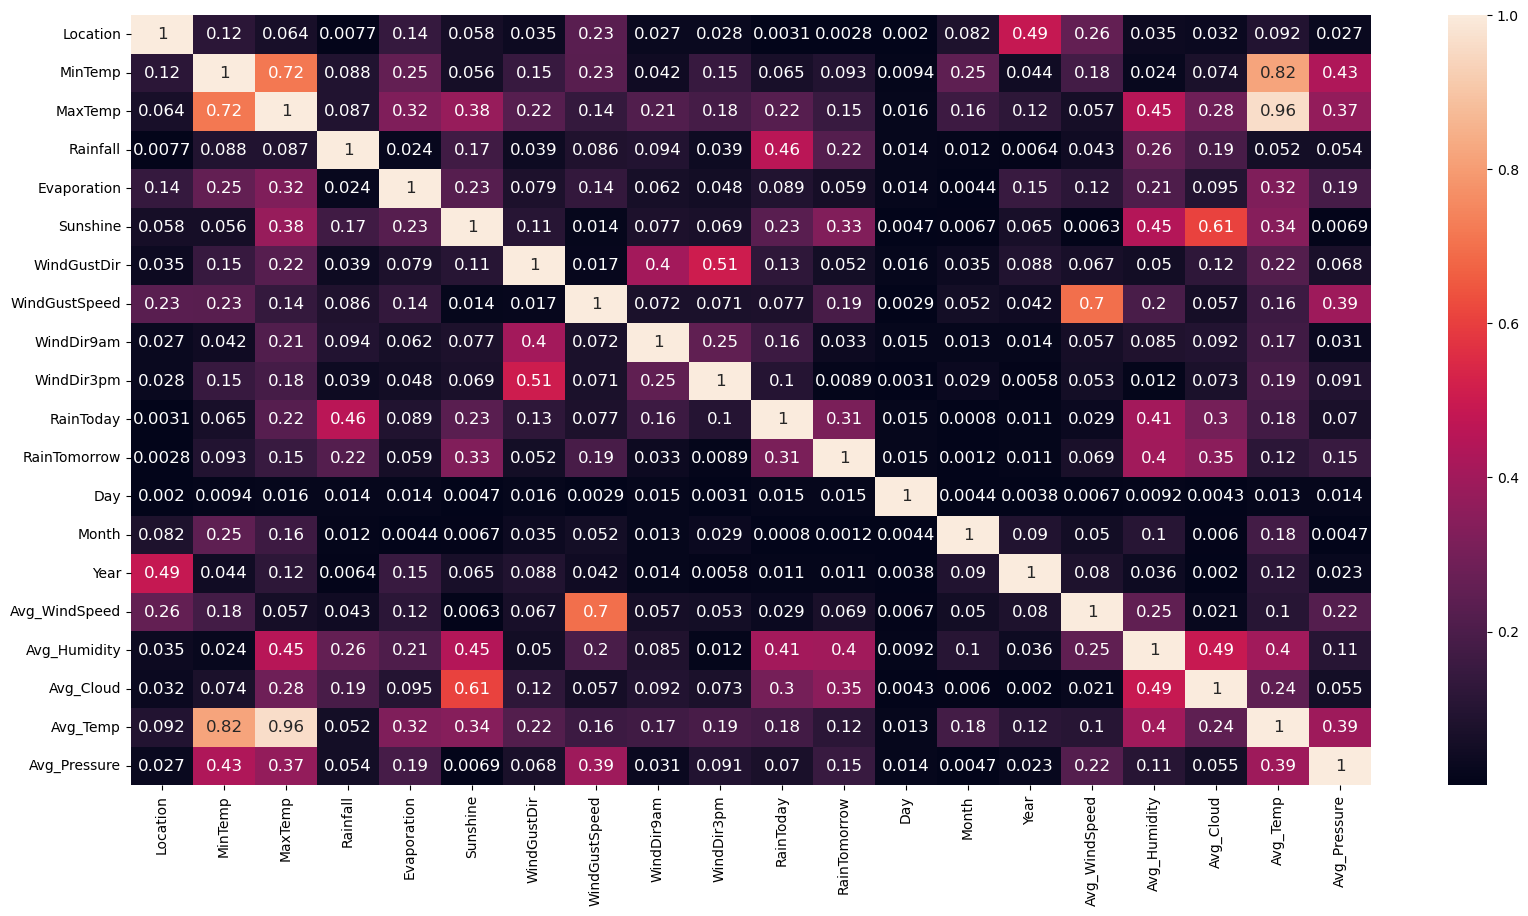

In [69]:
df_corr = df.corr().abs()

plt.figure(figsize = (20,10))
sns.heatmap(df_corr, annot = True, annot_kws={'size':12})
plt.show()

Checking Skewness and Outliers


In [70]:
x = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [71]:
print(x.shape)
print(y.shape)

(8425, 19)
(8425,)


In [72]:
x.skew().sort_values(ascending = False)


Evaporation      14.023948
Rainfall         13.218403
RainToday         1.242362
WindGustSpeed     0.757000
Avg_WindSpeed     0.644306
Year              0.418663
MaxTemp           0.380654
WindDir9am        0.172792
Avg_Temp          0.170653
WindGustDir       0.119640
Month             0.039388
Avg_Pressure      0.005032
Day               0.004260
Location         -0.050456
MinTemp          -0.089989
WindDir3pm       -0.119847
Avg_Humidity     -0.151055
Avg_Cloud        -0.374727
Sunshine         -0.716525
dtype: float64

In [73]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

In [74]:
pd.DataFrame(x_new, columns = x.columns).skew().sort_values(ascending = False)


RainToday        1.242362
Rainfall         0.904387
Evaporation      0.080305
WindGustSpeed    0.010481
Avg_Pressure     0.000947
Year             0.000000
MaxTemp         -0.010591
Avg_WindSpeed   -0.023574
Avg_Temp        -0.029065
Avg_Humidity    -0.047725
Sunshine        -0.075544
MinTemp         -0.102983
WindDir9am      -0.155025
Month           -0.155749
Location        -0.186657
WindGustDir     -0.187177
Avg_Cloud       -0.192919
Day             -0.211250
WindDir3pm      -0.248689
dtype: float64

In [75]:
x = pd.DataFrame(x_new, columns = x.columns)


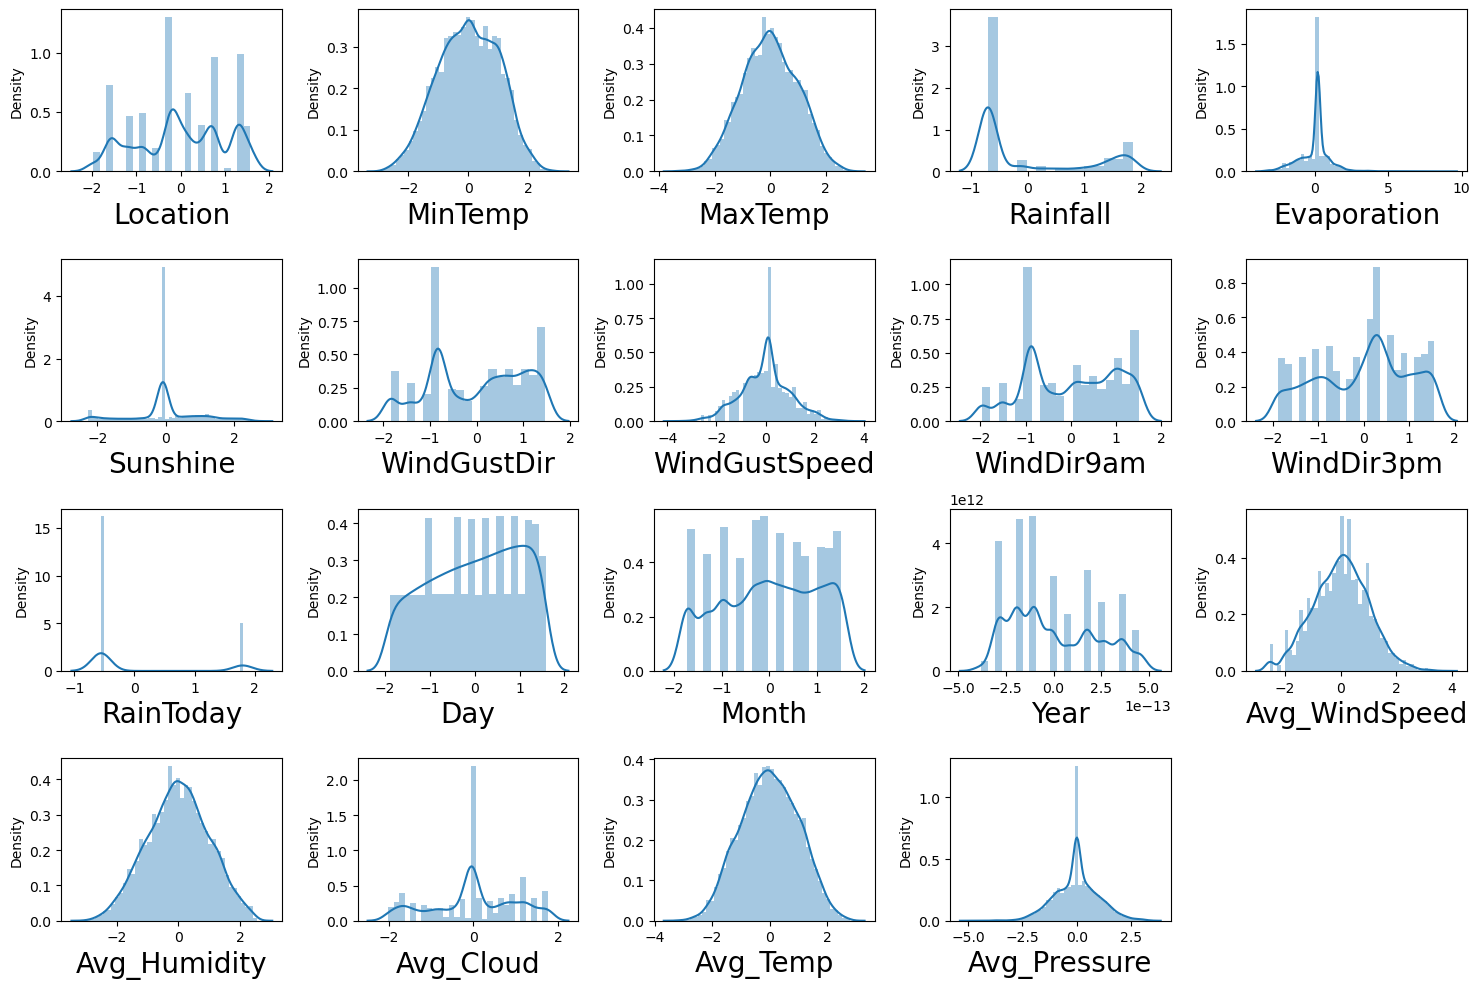

In [76]:
plt.figure(figsize = (15,10))
plotnumber = 1

for column in x:
    if plotnumber <= 20:
        ax = plt.subplot(4,5,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

Checking Outliers

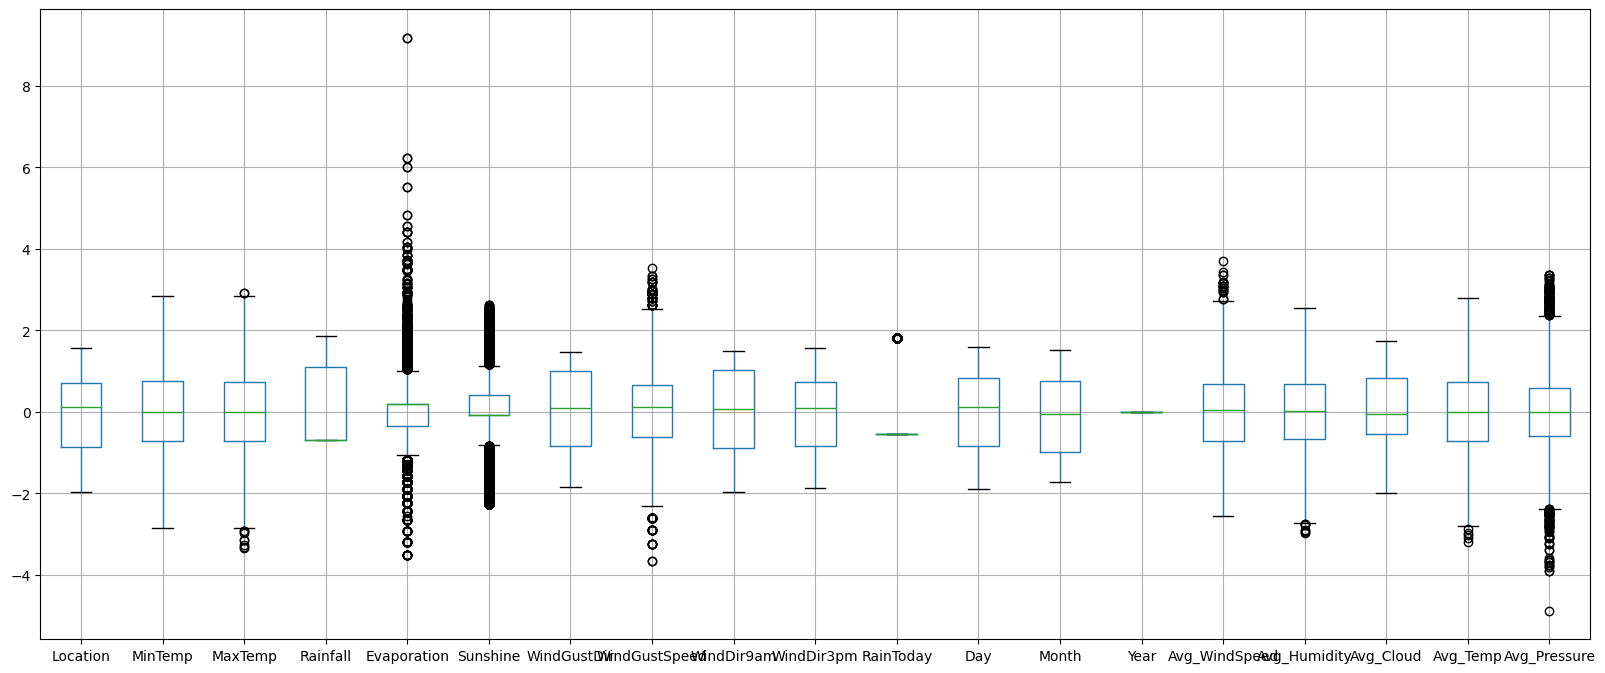

In [77]:
x.iloc[:,:].boxplot(figsize = (20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

In [78]:
from scipy.stats import zscore

print('High Side Outliers present')
print((zscore(x)<3).all())

print('****************************************')

print('Low Side Outliers Present')
print((zscore(x)>-3).all())

High Side Outliers present
Location          True
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation      False
Sunshine          True
WindGustDir       True
WindGustSpeed    False
WindDir9am        True
WindDir3pm        True
RainToday         True
Day               True
Month             True
Year              True
Avg_WindSpeed    False
Avg_Humidity      True
Avg_Cloud         True
Avg_Temp          True
Avg_Pressure     False
dtype: bool
****************************************
Low Side Outliers Present
Location          True
MinTemp           True
MaxTemp          False
Rainfall          True
Evaporation      False
Sunshine          True
WindGustDir       True
WindGustSpeed    False
WindDir9am        True
WindDir3pm        True
RainToday         True
Day               True
Month             True
Year              True
Avg_WindSpeed     True
Avg_Humidity      True
Avg_Cloud         True
Avg_Temp         False
Avg_Pressure     False
dtype: bool


In [80]:

#1st Quantile
q1 = x.quantile(0.25)

#3rd quantile
q3 = x.quantile(0.75)

#IQR
iqr = q3 - q1

In [83]:
Evaporation_high = q3.Evaporation + (1.5 * iqr.Evaporation)

# Check the Indexes which have higher values

index1 = np.where(x['Evaporation']> Evaporation_high)

x = x.drop(x['Evaporation'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(7622, 19)
(7622,)


In [82]:
WindGustSpeed_high = q3.WindGustSpeed + (1.5 * iqr.WindGustSpeed)

# Check the Indexes which have higher values

index1 = np.where(x['WindGustSpeed']> WindGustSpeed_high)

x = x.drop(x['WindGustSpeed'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(7622, 19)
(7622,)


In [84]:
Avg_WindSpeed_high = q3.Avg_WindSpeed + (1.5 * iqr.Avg_WindSpeed)

# Check the Indexes which have higher values

index1 = np.where(x['Avg_WindSpeed']>Avg_WindSpeed_high )

x = x.drop(x['Avg_WindSpeed'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(7616, 19)
(7616,)


In [85]:
Avg_Pressure_high = q3.Avg_Pressure + (1.5 * iqr.Avg_Pressure)

# Check the Indexes which have higher values

index1 = np.where(x['Avg_Pressure']>Avg_Pressure_high )

x = x.drop(x['Avg_Pressure'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(7509, 19)
(7509,)


In [87]:
MaxTemp_low = q1.MaxTemp - (1.5 * iqr.MaxTemp)

# Check the Indexes which have higher values

index1 = np.where(x['MaxTemp']< MaxTemp_low  )

x = x.drop(x['MaxTemp'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(7501, 19)
(7501,)


In [88]:
Evaporation_low = q1.Evaporation- (1.5 * iqr.Evaporation)

# Check the Indexes which have higher values

index1 = np.where(x['Evaporation']< Evaporation_low )

x = x.drop(x['Evaporation'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(6443, 19)
(6443,)


In [89]:
WindGustSpeed_low = q1.WindGustSpeed- (1.5 * iqr.WindGustSpeed)

# Check the Indexes which have higher values

index1 = np.where(x['WindGustSpeed']< WindGustSpeed_low  )

x = x.drop(x['WindGustSpeed'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(6362, 19)
(6362,)


In [90]:
Avg_Temp_low = q1.Avg_Temp- (1.5 * iqr.Avg_Temp)

# Check the Indexes which have higher values

index1 = np.where(x['Avg_Temp']< Avg_Temp_low  )

x = x.drop(x['Avg_Temp'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(6361, 19)
(6361,)


In [91]:
Avg_Pressure_low = q1. Avg_Pressure- (1.5 * iqr.Avg_Pressure)

# Check the Indexes which have higher values

index1 = np.where(x['Avg_Pressure']<  Avg_Pressure_low  )

x = x.drop(x['Avg_Pressure'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(6300, 19)
(6300,)


In [92]:
from scipy.stats import zscore

print('High Side Outliers present')
print((zscore(x)<3).all())

print('****************************************')

print('Low Side Outliers Present')
print((zscore(x)>-3).all())

High Side Outliers present
Location          True
MinTemp           True
MaxTemp          False
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
RainToday         True
Day               True
Month             True
Year              True
Avg_WindSpeed     True
Avg_Humidity      True
Avg_Cloud         True
Avg_Temp          True
Avg_Pressure      True
dtype: bool
****************************************
Low Side Outliers Present
Location          True
MinTemp           True
MaxTemp          False
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
RainToday         True
Day               True
Month             True
Year              True
Avg_WindSpeed     True
Avg_Humidity     False
Avg_Cloud         True
Avg_Temp         False
Avg_Pressure      True
dtype: bool


In [93]:
#1st Quantile
q1 = x.quantile(0.25)

#3rd quantile
q3 = x.quantile(0.75)

#IQR
iqr = q3 - q1

In [95]:
MaxTemp_high = q3.MaxTemp + (1.5 * iqr.MaxTemp)

# Check the Indexes which have higher values

index1 = np.where(x['MaxTemp']> MaxTemp_high)

x = x.drop(x['MaxTemp'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(6296, 19)
(6296,)


In [96]:
MaxTemp_low = q1.MaxTemp - (1.5 * iqr.MaxTemp)

# Check the Indexes which have higher values

index1 = np.where(x['MaxTemp']< MaxTemp_low  )

x = x.drop(x['MaxTemp'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(6278, 19)
(6278,)


In [97]:
Avg_Temp_low = q1.Avg_Temp - (1.5 * iqr.Avg_Temp)

# Check the Indexes which have higher values

index1 = np.where(x['Avg_Temp']< Avg_Temp_low)

x = x.drop(x['Avg_Temp'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(6265, 19)
(6265,)


In [98]:
Avg_Humidity_low = q1.Avg_Humidity- (1.5 * iqr.Avg_Humidity)

# Check the Indexes which have higher values

index1 = np.where(x['Avg_Humidity']< Avg_Humidity_low )

x = x.drop(x['Avg_Humidity'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(6260, 19)
(6260,)


In [99]:
from scipy.stats import zscore

print('High Side Outliers present')
print((zscore(x)<3).all())

print('****************************************')

print('Low Side Outliers Present')
print((zscore(x)>-3).all())

High Side Outliers present
Location          True
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
RainToday         True
Day               True
Month             True
Year              True
Avg_WindSpeed     True
Avg_Humidity      True
Avg_Cloud         True
Avg_Temp         False
Avg_Pressure      True
dtype: bool
****************************************
Low Side Outliers Present
Location         True
MinTemp          True
MaxTemp          True
Rainfall         True
Evaporation      True
Sunshine         True
WindGustDir      True
WindGustSpeed    True
WindDir9am       True
WindDir3pm       True
RainToday        True
Day              True
Month            True
Year             True
Avg_WindSpeed    True
Avg_Humidity     True
Avg_Cloud        True
Avg_Temp         True
Avg_Pressure     True
dtype: bool


In [100]:
Avg_Temp_high = q3.Avg_Temp + (1.5 * iqr.Avg_Temp)

# Check the Indexes which have higher values

index1 = np.where(x['Avg_Temp']> Avg_Temp_high)

x = x.drop(x['Avg_Temp'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(6255, 19)
(6255,)


In [101]:
from scipy.stats import zscore

print('High Side Outliers present')
print((zscore(x)<3).all())

print('****************************************')

print('Low Side Outliers Present')
print((zscore(x)>-3).all())

High Side Outliers present
Location         True
MinTemp          True
MaxTemp          True
Rainfall         True
Evaporation      True
Sunshine         True
WindGustDir      True
WindGustSpeed    True
WindDir9am       True
WindDir3pm       True
RainToday        True
Day              True
Month            True
Year             True
Avg_WindSpeed    True
Avg_Humidity     True
Avg_Cloud        True
Avg_Temp         True
Avg_Pressure     True
dtype: bool
****************************************
Low Side Outliers Present
Location         True
MinTemp          True
MaxTemp          True
Rainfall         True
Evaporation      True
Sunshine         True
WindGustDir      True
WindGustSpeed    True
WindDir9am       True
WindDir3pm       True
RainToday        True
Day              True
Month            True
Year             True
Avg_WindSpeed    True
Avg_Humidity     True
Avg_Cloud        True
Avg_Temp         True
Avg_Pressure     True
dtype: bool


In [102]:
Data_loss = ((8425-6255)/8425)*100

Data_loss

25.7566765578635

In [103]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x.columns

In [105]:
vif

,vif,features
0,1.593531,Location
1,6.989521,MinTemp
2,14.633397,MaxTemp
3,5.109942,Rainfall
4,1.193588,Evaporation
5,1.642327,Sunshine
6,1.546501,WindGustDir
7,1.960328,WindGustSpeed
8,1.278026,WindDir9am
9,1.443167,WindDir3pm


In [106]:
x = x.drop(['Avg_Temp'], axis=1)

x.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,Day,Month,Year,Avg_WindSpeed,Avg_Humidity,Avg_Cloud,Avg_Pressure
0,-1.57287,0.041124,-0.077141,0.534236,0.195503,-0.082709,1.160646,0.380260,1.179858,1.349376,-0.556099,-1.893365,1.511409,-3.785861e-13,0.720439,-0.834088,0.820975,-1.461738
1,-1.57287,-1.076281,0.280346,-0.698529,0.195503,-0.082709,1.319872,0.380260,-0.140685,1.552244,-0.556099,-1.710758,1.511409,-3.785861e-13,-0.256648,-1.554871,-0.044404,-1.170337
2,-1.57287,-0.051713,0.374368,-0.698529,0.195503,-0.082709,1.474872,0.515699,1.179858,1.552244,-0.556099,-1.544131,1.511409,-3.785861e-13,0.769440,-1.584206,-0.641697,-1.340310
3,-1.57287,-0.740202,0.722385,-0.698529,0.195503,-0.082709,-0.578373,-1.265782,0.473499,-1.874337,-0.556099,-1.388459,1.511409,-3.785861e-13,-0.639112,-1.787793,-0.044404,-0.199654
4,-1.57287,0.800894,1.327005,0.888946,0.195503,-0.082709,1.160646,0.169468,-1.528740,-0.137530,-0.556099,-1.240995,1.511409,-3.785861e-13,-0.196414,-0.149109,1.478348,-1.299837


In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x.columns


# Lets check the values 
vif

,vif,features
0,1.591532,Location
1,3.669213,MinTemp
2,3.977359,MaxTemp
3,5.099294,Rainfall
4,1.191640,Evaporation
5,1.637798,Sunshine
6,1.545461,WindGustDir
7,1.933966,WindGustSpeed
8,1.276851,WindDir9am
9,1.441555,WindDir3pm


Model Building


In [110]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [111]:
maxAccu = 0
maxRS = 0

model = [LogisticRegression(),
         RandomForestClassifier(),
         DecisionTreeClassifier(),
         KNeighborsClassifier(),
         SVC()]

for rs in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = rs)
    for i in model:
        i.fit(x_train, y_train)
        y_pred = i.predict(x_test)
        acc = accuracy_score(y_test,y_pred)
        print('Accuracy score', acc, 'random_state', rs, 'Model', i)
        if acc > maxAccu:
            maxAccu = acc
            maxRS = rs
            final_model = i
            
        
print('Max Accuracy score is', maxAccu, 'at random_state', rs, 'for Model:', i)

Accuracy score 0.8241687979539642 random_state 1 Model LogisticRegression()
Accuracy score 0.8804347826086957 random_state 1 Model RandomForestClassifier()
Accuracy score 0.8350383631713555 random_state 1 Model DecisionTreeClassifier()
Accuracy score 0.8190537084398977 random_state 1 Model KNeighborsClassifier()
Accuracy score 0.8356777493606138 random_state 1 Model SVC()
Accuracy score 0.8382352941176471 random_state 2 Model LogisticRegression()
Accuracy score 0.8881074168797954 random_state 2 Model RandomForestClassifier()
Accuracy score 0.8363171355498721 random_state 2 Model DecisionTreeClassifier()
Accuracy score 0.8222506393861893 random_state 2 Model KNeighborsClassifier()
Accuracy score 0.8491048593350383 random_state 2 Model SVC()
Accuracy score 0.828005115089514 random_state 3 Model LogisticRegression()
Accuracy score 0.8772378516624041 random_state 3 Model RandomForestClassifier()
Accuracy score 0.8324808184143222 random_state 3 Model DecisionTreeClassifier()
Accuracy score 

Accuracy score 0.8523017902813299 random_state 22 Model SVC()
Accuracy score 0.8312020460358056 random_state 23 Model LogisticRegression()
Accuracy score 0.8804347826086957 random_state 23 Model RandomForestClassifier()
Accuracy score 0.8260869565217391 random_state 23 Model DecisionTreeClassifier()
Accuracy score 0.8101023017902813 random_state 23 Model KNeighborsClassifier()
Accuracy score 0.8471867007672634 random_state 23 Model SVC()
Accuracy score 0.829923273657289 random_state 24 Model LogisticRegression()
Accuracy score 0.8906649616368286 random_state 24 Model RandomForestClassifier()
Accuracy score 0.8375959079283888 random_state 24 Model DecisionTreeClassifier()
Accuracy score 0.828005115089514 random_state 24 Model KNeighborsClassifier()
Accuracy score 0.8574168797953964 random_state 24 Model SVC()
Accuracy score 0.8414322250639387 random_state 25 Model LogisticRegression()
Accuracy score 0.8849104859335039 random_state 25 Model RandomForestClassifier()
Accuracy score 0.81969

Accuracy score 0.8043478260869565 random_state 44 Model KNeighborsClassifier()
Accuracy score 0.8337595907928389 random_state 44 Model SVC()
Accuracy score 0.8324808184143222 random_state 45 Model LogisticRegression()
Accuracy score 0.8804347826086957 random_state 45 Model RandomForestClassifier()
Accuracy score 0.8363171355498721 random_state 45 Model DecisionTreeClassifier()
Accuracy score 0.821611253196931 random_state 45 Model KNeighborsClassifier()
Accuracy score 0.8478260869565217 random_state 45 Model SVC()
Accuracy score 0.8190537084398977 random_state 46 Model LogisticRegression()
Accuracy score 0.8759590792838875 random_state 46 Model RandomForestClassifier()
Accuracy score 0.8343989769820972 random_state 46 Model DecisionTreeClassifier()
Accuracy score 0.8190537084398977 random_state 46 Model KNeighborsClassifier()
Accuracy score 0.8427109974424553 random_state 46 Model SVC()
Accuracy score 0.8203324808184144 random_state 47 Model LogisticRegression()
Accuracy score 0.872762

Accuracy score 0.8260869565217391 random_state 66 Model KNeighborsClassifier()
Accuracy score 0.8471867007672634 random_state 66 Model SVC()
Accuracy score 0.8343989769820972 random_state 67 Model LogisticRegression()
Accuracy score 0.8957800511508951 random_state 67 Model RandomForestClassifier()
Accuracy score 0.8427109974424553 random_state 67 Model DecisionTreeClassifier()
Accuracy score 0.8152173913043478 random_state 67 Model KNeighborsClassifier()
Accuracy score 0.8548593350383632 random_state 67 Model SVC()
Accuracy score 0.8331202046035806 random_state 68 Model LogisticRegression()
Accuracy score 0.8670076726342711 random_state 68 Model RandomForestClassifier()
Accuracy score 0.8158567774936062 random_state 68 Model DecisionTreeClassifier()
Accuracy score 0.8260869565217391 random_state 68 Model KNeighborsClassifier()
Accuracy score 0.8356777493606138 random_state 68 Model SVC()
Accuracy score 0.8350383631713555 random_state 69 Model LogisticRegression()
Accuracy score 0.88171

Accuracy score 0.8235294117647058 random_state 88 Model KNeighborsClassifier()
Accuracy score 0.8452685421994884 random_state 88 Model SVC()
Accuracy score 0.8331202046035806 random_state 89 Model LogisticRegression()
Accuracy score 0.8753196930946292 random_state 89 Model RandomForestClassifier()
Accuracy score 0.8535805626598465 random_state 89 Model DecisionTreeClassifier()
Accuracy score 0.8267263427109974 random_state 89 Model KNeighborsClassifier()
Accuracy score 0.8446291560102301 random_state 89 Model SVC()
Accuracy score 0.8171355498721228 random_state 90 Model LogisticRegression()
Accuracy score 0.8746803069053708 random_state 90 Model RandomForestClassifier()
Accuracy score 0.8388746803069054 random_state 90 Model DecisionTreeClassifier()
Accuracy score 0.8049872122762148 random_state 90 Model KNeighborsClassifier()
Accuracy score 0.8318414322250639 random_state 90 Model SVC()
Accuracy score 0.8324808184143222 random_state 91 Model LogisticRegression()
Accuracy score 0.86956

Accuracy score 0.8765984654731458 random_state 110 Model RandomForestClassifier()
Accuracy score 0.8254475703324808 random_state 110 Model DecisionTreeClassifier()
Accuracy score 0.8241687979539642 random_state 110 Model KNeighborsClassifier()
Accuracy score 0.8439897698209718 random_state 110 Model SVC()
Accuracy score 0.8286445012787724 random_state 111 Model LogisticRegression()
Accuracy score 0.8823529411764706 random_state 111 Model RandomForestClassifier()
Accuracy score 0.8152173913043478 random_state 111 Model DecisionTreeClassifier()
Accuracy score 0.8113810741687979 random_state 111 Model KNeighborsClassifier()
Accuracy score 0.8414322250639387 random_state 111 Model SVC()
Accuracy score 0.8273657289002557 random_state 112 Model LogisticRegression()
Accuracy score 0.8727621483375959 random_state 112 Model RandomForestClassifier()
Accuracy score 0.8305626598465473 random_state 112 Model DecisionTreeClassifier()
Accuracy score 0.8152173913043478 random_state 112 Model KNeighbor

Accuracy score 0.8120204603580563 random_state 131 Model KNeighborsClassifier()
Accuracy score 0.8286445012787724 random_state 131 Model SVC()
Accuracy score 0.8228900255754475 random_state 132 Model LogisticRegression()
Accuracy score 0.8734015345268542 random_state 132 Model RandomForestClassifier()
Accuracy score 0.8152173913043478 random_state 132 Model DecisionTreeClassifier()
Accuracy score 0.8171355498721228 random_state 132 Model KNeighborsClassifier()
Accuracy score 0.8388746803069054 random_state 132 Model SVC()
Accuracy score 0.8145780051150895 random_state 133 Model LogisticRegression()
Accuracy score 0.8817135549872123 random_state 133 Model RandomForestClassifier()
Accuracy score 0.840153452685422 random_state 133 Model DecisionTreeClassifier()
Accuracy score 0.8209718670076727 random_state 133 Model KNeighborsClassifier()
Accuracy score 0.8433503836317136 random_state 133 Model SVC()
Accuracy score 0.8350383631713555 random_state 134 Model LogisticRegression()
Accuracy s

Accuracy score 0.8861892583120204 random_state 153 Model RandomForestClassifier()
Accuracy score 0.8305626598465473 random_state 153 Model DecisionTreeClassifier()
Accuracy score 0.829923273657289 random_state 153 Model KNeighborsClassifier()
Accuracy score 0.8446291560102301 random_state 153 Model SVC()
Accuracy score 0.8241687979539642 random_state 154 Model LogisticRegression()
Accuracy score 0.879156010230179 random_state 154 Model RandomForestClassifier()
Accuracy score 0.8446291560102301 random_state 154 Model DecisionTreeClassifier()
Accuracy score 0.8190537084398977 random_state 154 Model KNeighborsClassifier()
Accuracy score 0.8446291560102301 random_state 154 Model SVC()
Accuracy score 0.8235294117647058 random_state 155 Model LogisticRegression()
Accuracy score 0.8785166240409207 random_state 155 Model RandomForestClassifier()
Accuracy score 0.8491048593350383 random_state 155 Model DecisionTreeClassifier()
Accuracy score 0.8248081841432225 random_state 155 Model KNeighborsC

Accuracy score 0.8164961636828645 random_state 174 Model KNeighborsClassifier()
Accuracy score 0.8471867007672634 random_state 174 Model SVC()
Accuracy score 0.8209718670076727 random_state 175 Model LogisticRegression()
Accuracy score 0.8753196930946292 random_state 175 Model RandomForestClassifier()
Accuracy score 0.8190537084398977 random_state 175 Model DecisionTreeClassifier()
Accuracy score 0.8145780051150895 random_state 175 Model KNeighborsClassifier()
Accuracy score 0.8465473145780051 random_state 175 Model SVC()
Accuracy score 0.8267263427109974 random_state 176 Model LogisticRegression()
Accuracy score 0.8785166240409207 random_state 176 Model RandomForestClassifier()
Accuracy score 0.8267263427109974 random_state 176 Model DecisionTreeClassifier()
Accuracy score 0.821611253196931 random_state 176 Model KNeighborsClassifier()
Accuracy score 0.8375959079283888 random_state 176 Model SVC()
Accuracy score 0.8254475703324808 random_state 177 Model LogisticRegression()
Accuracy s

Accuracy score 0.8746803069053708 random_state 196 Model RandomForestClassifier()
Accuracy score 0.8439897698209718 random_state 196 Model DecisionTreeClassifier()
Accuracy score 0.8132992327365729 random_state 196 Model KNeighborsClassifier()
Accuracy score 0.8324808184143222 random_state 196 Model SVC()
Accuracy score 0.8350383631713555 random_state 197 Model LogisticRegression()
Accuracy score 0.879156010230179 random_state 197 Model RandomForestClassifier()
Accuracy score 0.8254475703324808 random_state 197 Model DecisionTreeClassifier()
Accuracy score 0.8273657289002557 random_state 197 Model KNeighborsClassifier()
Accuracy score 0.8439897698209718 random_state 197 Model SVC()
Accuracy score 0.821611253196931 random_state 198 Model LogisticRegression()
Accuracy score 0.8804347826086957 random_state 198 Model RandomForestClassifier()
Accuracy score 0.8286445012787724 random_state 198 Model DecisionTreeClassifier()
Accuracy score 0.8203324808184144 random_state 198 Model KNeighborsC

In [112]:
print('Max Accuracy score is', maxAccu, 'at random_state', rs, 'for Model:', i)


Max Accuracy score is 0.9008951406649617 at random_state 199 for Model: SVC()


In [113]:
from sklearn.model_selection import cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 199)

svc = SVC()

svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

print('Accuracy Score: ', accuracy_score(y_test, y_pred))

for i in range (2,11):
    cvscore = cross_val_score(svc, x_scaled, y, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("Accuracy_Score is : ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.8356777493606138
At CV: 2
Cross Validation Score is:  82.44597626317112
Accuracy_Score is :  0.8356777493606138
At CV: 3
Cross Validation Score is:  79.69624300559553
Accuracy_Score is :  0.8356777493606138
At CV: 4
Cross Validation Score is:  82.70196503870679
Accuracy_Score is :  0.8356777493606138
At CV: 5
Cross Validation Score is:  79.24860111910472
Accuracy_Score is :  0.8356777493606138
At CV: 6
Cross Validation Score is:  81.80688795117682
Accuracy_Score is :  0.8356777493606138
At CV: 7
Cross Validation Score is:  82.89422685658884
Accuracy_Score is :  0.8356777493606138
At CV: 8
Cross Validation Score is:  83.00571272321208
Accuracy_Score is :  0.8356777493606138
At CV: 9
Cross Validation Score is:  82.81374900079936
Accuracy_Score is :  0.8356777493606138
At CV: 10
Cross Validation Score is:  83.2142875399361
Accuracy_Score is :  0.8356777493606138


Parameter Tuning using GridSearchCV


In [114]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grd = GridSearchCV(svc, param_grid = param_grid)
grd.fit(x_train, y_train)

print('Best Param ==>', grd.best_params_)

clf = grd.best_estimator_      # reinstiating with best parameters

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

svc_conf_mat = confusion_matrix(y_test, y_pred)

print('\nconf_mat ==>', '\n', svc_conf_mat)

print('\nAccuracy rf Normal ==>', '\n', accuracy_score(y_test, y_pred))

Best Param ==> {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

conf_mat ==> 
 [[1135   67]
 [ 148  214]]

Accuracy rf Normal ==> 
 0.862531969309463


In [115]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1202
           1       0.76      0.59      0.67       362

    accuracy                           0.86      1564
   macro avg       0.82      0.77      0.79      1564
weighted avg       0.86      0.86      0.86      1564



In [116]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = True)

print(fpr)
print('*******')
print(tpr)
print('*******')
print(thresholds)

[0.         0.05574043 1.        ]
*******
[0.         0.59116022 1.        ]
*******
[2 1 0]


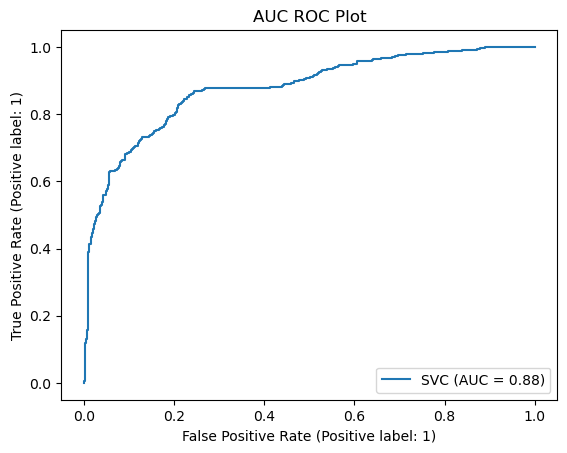

In [117]:
plot_roc_curve(clf, x_test, y_test)
plt.title("AUC ROC Plot")
plt.show()

In [119]:
import joblib
joblib.dump(clf, "Rainfall_Prediction_Classifier.pkl")

['Rainfall_Prediction_Classifier.pkl']